<a href="https://colab.research.google.com/github/RozitaAbdoli/credit_default_mining/blob/main/Model_comparison.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Comparing the performance of multiple ML algorithms
In this notebook, the performance of several ML algorithms including ensemble learners will be compared. The ensemble learners are Random Forest, Adaptive Boost, and Gradient Boost Algorithms that use Decision Trees as weak learners. They:  

* Are non-parametric and don't require data to be normally distributed.
* Can handle both numeric and categorical data types, and categorical predictors don't have to be one-hot encoded.
* The correlation between predictors does not affect the performance of the model.

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab

from sklearn.model_selection import train_test_split

from sklearn import preprocessing
from imblearn.combine import SMOTETomek 

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
# from sklearn.neural_network import MLPClassifier
# from sklearn.svm import SVC

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, roc_curve, roc_auc_score, f1_score

import time

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [2]:
#Import Drive API and authenticate
from google.colab import drive
#Mount Drive to the Colab VM
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
#Load the dataset into pandas DataFrame
df = pd.read_csv("/content/drive/MyDrive/Capstone_project/v2_credit_default.csv")

In [4]:
# #  Selected features Based on Pearson and Spearman's rank correlations with the dependent variable, and XGBoost feature importance rankings:
# df = df[['AGE', 'LIMIT_BAL', 'Pay_Apr', 'Repay_Sept', 'Pay_Sept','Default' ]]

In [5]:
df.shape

(29965, 24)

In [6]:
#Seperate the independent and dependent variables.
df_independent = df.drop(['Default'], axis=1)
df_default = df['Default']

In [7]:
# split the data into 75% training+validation and 25% test
X_train, X_test, y_train, y_test = train_test_split(df_independent, df_default, test_size=0.25, random_state=1) 

In [8]:
# Scale X_train
X_train_scaled = preprocessing.MinMaxScaler().fit_transform(X_train)

In [9]:
# Balance the training data using SMOTE Tomek
X_smt, y_smt = SMOTETomek(random_state=1).fit_sample(X_train_scaled, y_train.squeeze())
# X_smt, y_smt = SMOTETomek(random_state=1).fit_sample(X_train, y_train.squeeze())    #use this line, if skipping the scaling step

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [10]:
#List the classifiers to be compared
names = ["Logistic Regression","KNN", "QDA", "Naive Bayes","Decision Tree", "Random Forest", "AdaBoost", "GradientBoost"]  

clfs = [
    LogisticRegression(random_state=1, C= 50, penalty= 'l1', solver= 'liblinear'),
    KNeighborsClassifier(),                           #n_neighbors=5 
    QuadraticDiscriminantAnalysis(),
    GaussianNB(),
    DecisionTreeClassifier(max_depth=5),              #set max_depth 
    RandomForestClassifier(max_depth=5, n_estimators=100),
    AdaBoostClassifier(n_estimators=100), 
    GradientBoostingClassifier(n_estimators=100, learning_rate=1.0),           
    ]

In [11]:
accuracies = []
precisions = []
recalls = []
roc_auc = []
elapsed_time = []


for name, clf in zip(names, clfs):
    start = time.time()
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)
    precision = precision_score(y_test, y_pred)
    precisions.append(precision)
    recall = recall_score(y_test, y_pred)
    recalls.append(recall)
    roc_auc = roc_auc_score
    end = time.time()
    elapsed = end - start
    elapsed_time.append(elapsed)

In [12]:
#Precision= TP/(TP+FP), Recall= TP/(TP+FN)
scores_df = pd.DataFrame()
scores_df['Algorithm'] = names
scores_df['Accuracy'] = accuracies
scores_df['Precision'] = precisions
scores_df['Recall'] = recalls
scores_df['Elapsed-time(s)'] = elapsed_time
scores_df

,Algorithm,Accuracy,Precision,Recall,Elapsed-time(s)
0,Logistic Regression,0.813267,0.709845,0.250305,0.493233
1,KNN,0.757742,0.385733,0.177832,1.126364
2,QDA,0.618793,0.334424,0.746650,0.076305
3,Naive Bayes,0.391484,0.247533,0.870889,0.034424
4,Decision Tree,0.818340,0.659478,0.353837,0.192651
5,Random Forest,0.818073,0.672010,0.331912,2.353638
6,AdaBoost,0.815136,0.653892,0.332521,4.515006
7,GradientBoost,0.804058,0.582700,0.373325,10.073525


In [13]:
#Change the global figure parameters using pylab
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (15, 5),
         'axes.labelsize': 22,
         'axes.titlesize':'x-large',
         'xtick.labelsize':18,
         'ytick.labelsize':18}
pylab.rcParams.update(params)

(array([0, 1, 2, 3, 4, 5, 6, 7]), <a list of 8 Text major ticklabel objects>)

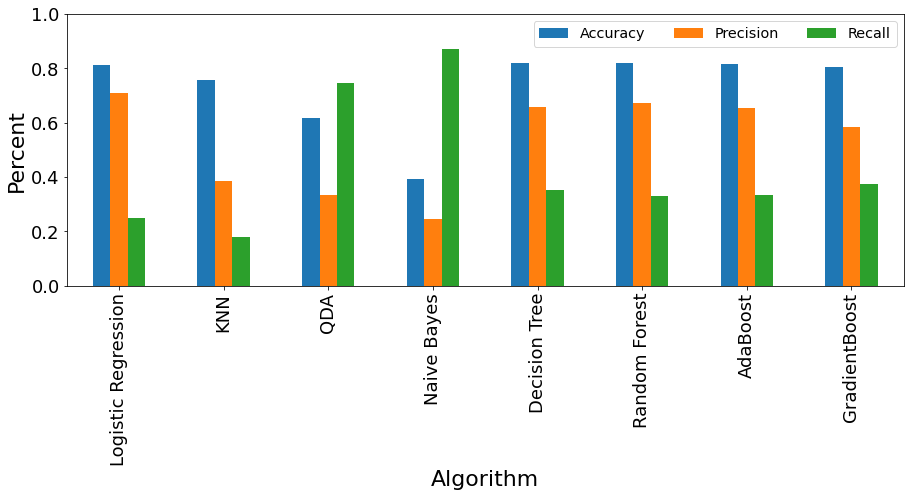

In [14]:
scores_df.plot(x="Algorithm", y=["Accuracy", "Precision", "Recall"], kind="bar")
plt.ylim([0, 1])
plt.legend(loc="upper right", ncol=len(df.columns))
plt.ylabel("Percent")
plt.xticks(rotation=90)

Some notes:

* Scaling inputs between 0 and 1 did not affect the performance of the models much.
* Can see the trade-off between precision and recall in this algorithms: when precision is high recall suffers, and vice versa.

In [15]:
#Plot all attribues as subplots
# scores_df.plot(x="Algorithm", y=["Accuracy", "Precision", "Recall", "Elapsed-time(s)"], subplots=True)
# plt.show()

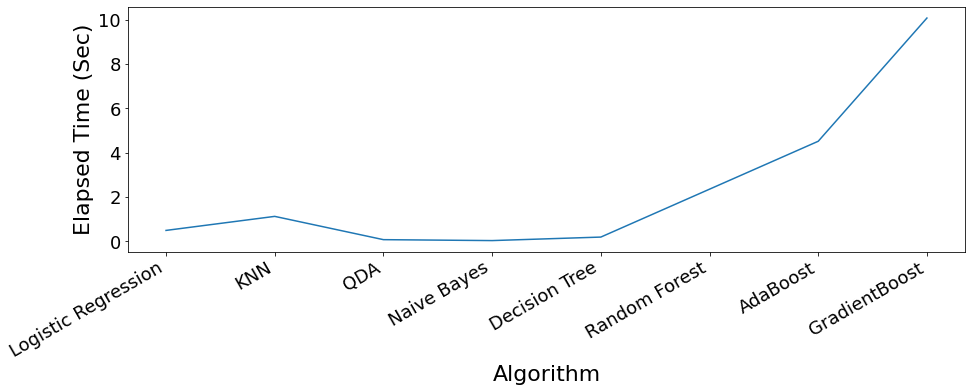

In [16]:
scores_df.plot(x="Algorithm", y=["Elapsed-time(s)"], subplots=True, legend=None)
plt.ylabel('Elapsed Time (Sec)')
plt.show()

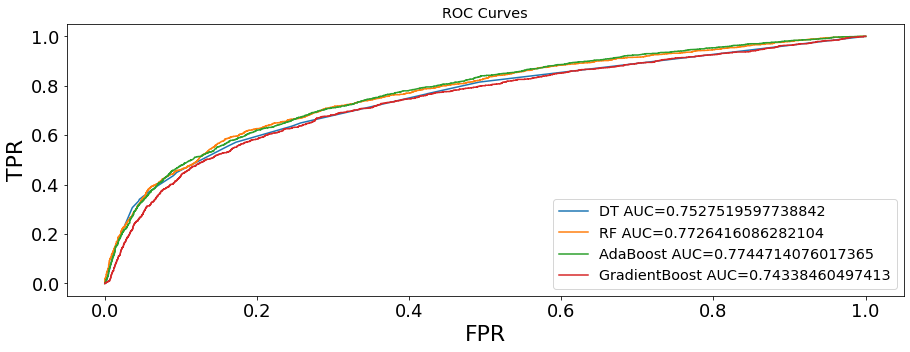

In [17]:
# The ROC curves and the ROC AUC

# model=LogisticRegression(C= 50, penalty= 'l1', solver= 'liblinear'),
    # KNeighborsClassifier(),                           #n_neighbors=5 
    # QuadraticDiscriminantAnalysis(),
    # GaussianNB(),
    # DecisionTreeClassifier(max_depth=5),              #set max_depth 

model=DecisionTreeClassifier(max_depth=5)              #set max_depth 
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[::,1] 
FPR, TPR, _ = roc_curve(y_test, y_pred_proba)            #roc_curve(y_true, y_score)
auc = roc_auc_score(y_test, y_pred_proba)
plt.plot(FPR,TPR,label="DT AUC="+str(auc))

model=RandomForestClassifier(max_depth=5, n_estimators=100)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[::,1] 
FPR, TPR, _ = roc_curve(y_test, y_pred_proba)            #roc_curve(y_true, y_score)
auc = roc_auc_score(y_test, y_pred_proba)
plt.plot(FPR,TPR,label="RF AUC="+str(auc))


model=AdaBoostClassifier(n_estimators=100)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[::,1] 
FPR, TPR, _ = roc_curve(y_test, y_pred_proba)            #roc_curve(y_true, y_score)
auc = roc_auc_score(y_test, y_pred_proba)
plt.plot(FPR,TPR,label="AdaBoost AUC="+str(auc))

model=GradientBoostingClassifier(n_estimators=100, learning_rate=1.0)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[::,1] 
FPR, TPR, _ = roc_curve(y_test, y_pred_proba)            #roc_curve(y_true, y_score)
auc = roc_auc_score(y_test, y_pred_proba)
plt.plot(FPR,TPR,label="GradientBoost AUC="+str(auc))

plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC Curves')
plt.legend(loc=4) 
plt.show()